In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

X_train = train[['artist', 'album', 'text', 'name']]
y_train = train['written_precoup']

X_test = test[['artist', 'album', 'text', 'name']]
y_test = test['written_precoup']

X_train.columns

In [ ]:
X_train = pd.get_dummies(X_train, columns=['artist', 'album'])
X_test = pd.get_dummies(X_test, columns=['artist', 'album'])

In [ ]:
cvec = CountVectorizer()

In [ ]:
counts = cvec.fit_transform(X_train['text'] + " " + X_train['name'] )

In [ ]:
X_train = X_train[[i for i in X_train.columns if (i != 'text') and (i != 'name')]]

In [ ]:
X_train.select_dtypes(exclude=['O']).values.shape

In [ ]:
counts.shape

In [ ]:
a = X_train.select_dtypes(exclude=['O']).values
b = counts

In [ ]:
a.shape, b.shape

In [ ]:
X_train = np.concatenate((a, b.toarray()), axis = 1)

In [ ]:
X_train.shape

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test)), fmt = 'g', annot = True)

# tn, fp, fn, tp = confusion_matrix(y_test, gnb.predict(X_test)).ravel()

# sens = tp/(tp + fn)
# spec = tn/(tn + fp)
# print('Sensitivity:',sens)
# print('Specificity:',spec)

# Pretty shitty performance.

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), fmt = 'g', annot = True)

# tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test)).ravel()

# sens = tp/(tp + fn)
# spec = tn/(tn + fp)
# print('Sensitivity:',sens)
# print('Specificity:',spec)

# np.mean(y)

# f1_score(y_test, lr.predict(X_test))

# for item in pd.Series(lr.coef_[0]).sort_values()[:100].index:
#     print((cvec.get_feature_names()[item] + ':').ljust(15), round(pd.Series(lr.coef_[0]).sort_values()[item], 5))

# tfidf = TfidfVectorizer(stop_words=STOP_WORDS)
# tfidf.fit(corpus)
# matrix = tfidf.transform(corpus)
# X = matrix.toarray()
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), fmt = 'g', annot = True)

# tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test)).ravel()

# sens = tp/(tp + fn)
# spec = tn/(tn + fp)
# print('Sensitivity:',sens)
# print('Specificity:',spec)

# f1_score(y_test, lr.predict(X_test))

# for item in pd.Series(lr.coef_[0]).sort_values(ascending = False)[:100].index:
#     print((tfidf.get_feature_names()[item] + ':').ljust(15), round(pd.Series(lr.coef_[0])[item], 5))

## Let's try again

In [ ]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

X_train = train[['artist', 'album', 'text', 'name']]
y_train = train['written_precoup']

X_test = test[['artist', 'album', 'text', 'name']]
y_test = test['written_precoup']


train_ind = X_train.index
test_ind = X_test.index

X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
X_train = X_total.loc[train_ind, :]
X_test = X_total.loc[test_ind, :]

# cvec = CountVectorizer()
# cvec.fit(X_train['text'])

# transformed_train = pd.DataFrame(cvec.transform(X_train['text']).todense(), columns=cvec.get_feature_names())
# transformed_test = pd.DataFrame(cvec.transform(X_test['text']).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [ ]:
X_train = X_train[[i for i in X_train.columns if (i != 'text') & (i != 'name')]]

In [ ]:
X_test = X_test[[i for i in X_test.columns if (i != 'text') & (i != 'name')]]

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_test.sum()/len(y_test)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
pd.DataFrame({
    'param':X_train.columns,
    'coef':lr.coef_[0]
}).sort_values(by = 'coef', ascending = False)

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), fmt = 'g', annot = True)

In [2]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

corpus_train = train['name']
y_train = train['written_precoup']

corpus_test = test['name']
y_test = test['written_precoup']




# X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
# X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
# X_train = X_total.loc[train_ind, :]
# X_test = X_total.loc[test_ind, :]

cvec = CountVectorizer(min_df = 3, max_features=5000)
cvec.fit(corpus_train)

transformed_train = pd.DataFrame(cvec.transform(corpus_train).todense(), columns=cvec.get_feature_names())
transformed_test = pd.DataFrame(cvec.transform(corpus_test).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [ ]:
lr = LogisticRegression()
lr.fit(transformed_train, y_train)

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(transformed_test)), fmt = 'g', annot = True)

In [ ]:
f1_score(y_test, lr.predict(transformed_test))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(transformed_test)).ravel() 

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)

print("spec:",specificity)

In [4]:
supvec = SVC(random_state=42, C=100000, probability=True)

In [5]:
supvec.fit(transformed_train, y_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = supvec.predict(transformed_test)

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)
print("spec:",specificity)

sens: 0.235042735043
spec: 0.814291030889


In [85]:
from sklearn.naive_bayes import MultinomialNB
%run ../scripts/post_scraping_text_processing.py run

df loaded.
15425 rows x 5 columns


In [98]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

corpus_train = train['name']
y_train = train['written_precoup']

corpus_test = test['name']
y_test = test['written_precoup']




# X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
# X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
# X_train = X_total.loc[train_ind, :]
# X_test = X_total.loc[test_ind, :]

cvec = CountVectorizer(min_df = 3, max_features=10000, ngram_range=(1,2), stop_words=STOP_WORDS)
cvec.fit(corpus_train)

transformed_train = pd.DataFrame(cvec.transform(corpus_train).todense(), columns=cvec.get_feature_names())
transformed_test = pd.DataFrame(cvec.transform(corpus_test).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [104]:
mnb = MultinomialNB()

In [105]:
mnb.fit(transformed_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
y_pred = mnb.predict(transformed_test)

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)
print("spec:",specificity)

sens: 0.103418803419
spec: 0.937476739859


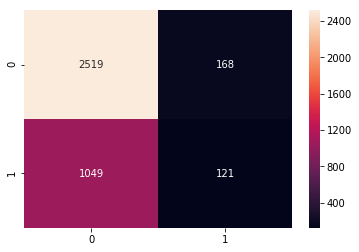

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt = 'g', annot = True)